# Introducción a MLflow

MLflow es una plataforma de código abierto para el ciclo de vida del aprendizaje automático (ML), con un enfoque en la reproducibilidad, el entrenamiento y la implementación. Está basado en un diseño de interfaz abierta y es capaz de trabajar con cualquier lenguaje o plataforma, con clientes en Python y Java, y es accesible a través de una API REST. La escalabilidad también es un beneficio importante que un desarrollador de ML puede aprovechar con MLflow.

El proposito de este cuaderno,  es ver cómo funciona MLflow, con la ayuda de ejemplos y código de muestra. Esto construirá la base necesaria para el resto a fin de utilizar el concepto para diseñar un proyecto de ML de extremo a extremo.


## **¿Qué es MLflow?**
Implementar un producto basado en ML puede ser una tarea laboriosa. Existe una necesidad general de reducir la fricción entre los diferentes pasos del ciclo de vida de desarrollo de ML y entre los equipos de científicos e ingenieros de datos que participan en el proceso.

Los profesionales de ML, como los científicos de datos y los ingenieros de ML, operan con diferentes sistemas, estándares y herramientas. Si bien los científicos de datos pasan la mayor parte de su tiempo desarrollando modelos en herramientas como Jupyter Notebooks, cuando se ejecutan en producción, el modelo se implementa en el contexto de una aplicación de software con un entorno que es más exigente en términos de escala y confiabilidad.

Una ocurrencia común en los proyectos de ML es que un equipo de ingeniería vuelva a implementar los modelos, creando un sistema personalizado para servir al modelo específico. Un conjunto de desafíos son comunes con los equipos que siguen enfoques personalizados con respecto al desarrollo de modelos:
* Proyectos de ML que superan el presupuesto debido a la necesidad de crear una infraestructura de software a medida para desarrollar y servir modelos
* Errores de traducción al reimplementar los modelos producidos por científicos de datos
* Problemas de escalabilidad al entregar predicciones
* Fricción a la hora de reproducir procesos de formación entre científicos de datos por falta de entornos estándar

Las empresas que aprovechan ML tienden a crear sus propios sistemas internos (a menudo extremadamente laboriosos) para garantizar un proceso fluido y estructurado de desarrollo de ML. Las plataformas de ML ampliamente documentadas incluyen sistemas como Michelangelo y FBLearner, de Uber y Facebook, respectivamente.

Es en el contexto de la creciente adopción de ML que MLflow se creó inicialmente en Databricks y de código abierto como plataforma, para ayudar en la implementación de sistemas de ML.

MLflow permite a un profesional diario en una plataforma administrar el ciclo de vida de ML, desde la iteración en el desarrollo del modelo hasta la implementación en un entorno confiable y escalable que es compatible con los requisitos del sistema de software moderno.

## Componetes de MLflow
Los módulos de MLflow son componentes de software que ofrecen las características principales que ayudan en las diferentes fases del ciclo de vida de ML. Las características de MLflow se entregan a través de módulos, componentes extensibles que organizan características relacionadas en la plataforma.

Los siguientes son los módulos integrados en MLflow:
* **Seguimiento de MLflow (MLflow Tracking):** proporciona un mecanismo y una interfaz de usuario para manejar métricas y artefactos generados por ejecuciones de ML (entrenamiento e inferencia)
* **Mlflow Projects:** un formato de paquete para estandarizar proyectos de ML.
* **Modelos Mlflow:** un mecanismo que se implementa en diferentes tipos de entornos, tanto locales como en la nube
* **Registro de modelos de Mlflow:** un módulo que maneja la gestión de modelos en MLflow y su ciclo de vida, incluido el estado

## **Explorando MLflow tracking**
El componente de MLflow tracking es responsable de la observabilidad. Las características principales de este módulo son el registro de métricas, artifact y parámetros de una ejecución de MLflow. Proporciona visualizaciones y funciones de gestión de artifact.

En una configuración de producción, se usa como un servidor de seguimiento centralizado implementado en Python que puede ser compartido por un grupo de profesionales de ML en una organización. Esto permite que las mejoras en los modelos de ML se compartan dentro de la organización.

El interfaz que registra todas las ejecuciones de su modelo y le permite registrar los observables de su experimento (métricas, archivos, modelos y artifact). Para cada ejecución, puede buscar y comparar las diferentes métricas y parámetros de su módulo.

Aborda los puntos débiles comunes cuando los desarrolladores de modelos comparan diferentes iteraciones de sus modelos en diferentes parámetros y configuraciones.

# Model Experimentation Tracking (MLFow)

### Record and query experiments: Code, data, config, results, parameters, metrics

![Data](images/MLflow_Model_experimentation.png)

## Importamos las librerias

In [1]:
# Análisis y tratamiento de datos
import numpy as np
import pandas as pd

# Machine Learning library
import sklearn
from sklearn.metrics import roc_curve, auc, accuracy_score, plot_confusion_matrix, plot_roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# pip install --force-reinstall graphviz==0.18
import lightgbm as lgb
from lightgbm import LGBMClassifier
from lightgbm import plot_importance, plot_metric

# Model experimentation library
import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient

# Plotting library
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
print(f'Versión Numpy es {np.__version__}')
print(f'Versión Pandas es {pd.__version__}')
print(f'Versión sklearn es {sklearn.__version__}')
print(f'Versión mlflow es {mlflow.__version__}')

Versión Numpy es 1.21.6
Versión Pandas es 1.4.3
Versión sklearn es 1.0.2
Versión mlflow es 1.22.0


## Cargamos nuestro datos

In [3]:
## archivo
data_file = 'Placement_Data_Full_Class.csv'

# cargamos el dataset
try:
    data = pd.read_csv(data_file)
    print("El conjunto de datos tiene {} muestras con {} características.".format(*data.shape))
except:
    print("No se pudo cargar el conjunto de datos. ¿Falta el conjunto de datos?")

El conjunto de datos tiene 215 muestras con 15 características.


## Explorando nuestro dataset

In [4]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
data['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

## Start MLflow UI

In [6]:
!mlflow ui

^C


## Initialize MLflow

**Experiments** : Puede organizar ejecuciones en experimentos, que agrupan ejecuciones para una tarea específica.

**Tracking URI**: Las ejecuciones de MLflow se pueden grabar en archivos locales, en una base de datos o de forma remota en un servidor de seguimiento. De forma predeterminada, los registros de la API Python de MLflow se ejecutan localmente en archivos en un directorio mlruns dondequiera que haya ejecutado su programa.

#### MLflow Tracking Servers 
El servidor de seguimiento de MLflow tiene dos componentes para el almacenamiento: a **backend store** and an **artifact store**

El **backend store** es donde MLflow Tracking Server almacena metadatos de experimentos y ejecuciones, así como parámetros, métricas y etiquetas para ejecuciones. MLflow admite dos tipos de almacenes backend: **file store and database-backed store**.

El **artifact store** es una ubicación adecuada para grandes datos (como un depósito S3 o un sistema de archivos NFS compartido) y es donde los clientes registran la salida de sus artefactos (por ejemplo, modelos).

    Amazon S3 and S3-compatible storage
    Azure Blob Storage
    Google Cloud Storage
    FTP server
    SFTP Server
    NFS
    HDFS

In [8]:
experiment_name = "Modelo de Clasificación"
artifact_repository = './mlflow-run'

# Proporcione uri y conéctese a su servidor de seguimiento
mlflow.set_tracking_uri('http://127.0.0.1:5000/')

# Inicializar cliente MLflow
client = MlflowClient()

# Si el experimento no existe, creará un nuevo
# de lo contrario, tomará la identificación del experimento y lo usará para ejecutar los experimentos
try:
    # Creamos el experimento
    experiment_id = client.create_experiment(experiment_name, artifact_location=artifact_repository)
except:
    # Obtener la identificación del experimento si ya existe
    experiment_id = client.get_experiment_by_name(experiment_name).experiment_id

## Preparar datos para el entrenamiento del modelo

In [14]:
exclude_feature = ['sl_no', 'salary', 'status']
# Define Target columns
target = data['status'].map({"Placed": 0 , "Not Placed": 1})

# Definir características numéricas y categóricas
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numeric_features = [col for col in numeric_columns if col not in exclude_feature]
categorical_features = [col for col in categorical_columns if col not in exclude_feature]

# Definir la lista final de características para entrenamiento y validación.
features = numeric_features + categorical_features

# Datos finales para entrenamiento y validación
data = data[features]
data = data.fillna(0)

# Split data in train and vlaidation
X_train, X_valid, y_train, y_valid = train_test_split(data, target, test_size=0.15, random_state=10)

# Realizar codificación de etiquetas para variables categóricas
for feature in categorical_features:
    le = LabelEncoder()
    le.fit(X_train.loc[:, feature])
    X_train.loc[:, feature] = le.transform(X_train.loc[:, feature])
    X_valid.loc[:, feature] = le.transform(X_valid.loc[:, feature])

## Definir la función de experimentación del modelo MLFlow

In [17]:
def model_experimentation(classifier, param, model_name, run_name):
        # Lanzar múltiples ejecuciones en un programa. Esto es fácil de hacer porque el objeto ActiveRun 
        #devuelto por mlflow.start_run() es un
        # Administrador de contexto de Python. Puede "alcanzar" cada ejecución a un solo bloque de código 
        #de la siguiente manera:
    with mlflow.start_run(experiment_id=experiment_id, run_name=run_name) as run:
        # Get run id 
        run_id = run.info.run_uuid
        
        # Proporcione notas breves sobre el run.
        MlflowClient().set_tag(run_id,
                               "mlflow.note.content",
                "Este es un experimento para explorar diferentes modelos de aprendizaje automático para Campus Recruitment Dataset")

        # Para habilitar el registro automático para estimadores de scikit-learn.
         # 1) Parámetros del estimador de registros
         # 2) Registrar métricas comunes para el clasificador
         # 3) Artefactos del modelo de registro
        mlflow.sklearn.autolog()

        # Definimos el custom tag
        tags = {"Application": "Payment Monitoring Platform",
                "release.candidate": "PMP",
                "release.version": "2.2.0"}
        
        # Set Tag
        mlflow.set_tags(tags)
                        
        # Log python environment details
        mlflow.log_artifact('requirements.txt')
        
        # llevar acabo el model training
        clf = classifier(**param)
        clf.fit(X_train, y_train)

        # LLevar acabo la evaluación del modelo
        valid_prediction = clf.predict_proba(X_valid)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_valid, valid_prediction)
        roc_auc = auc(fpr, tpr) # compute area under the curve
        print("=====================================")
        print("Validación AUC:{}".format(roc_auc))
        print("=====================================")
        
        # log metrics
        mlflow.log_metrics({"Validation_AUC": roc_auc})

        # gráficos y save metrics details    
        plot_confusion_matrix(clf, X_valid, y_valid, 
                              display_labels=['Placed', 'Not Placed'],
                              cmap='magma')
        plt.title('Confusion Matrix')
        filename = f'./images/{model_name}_validation_confusion_matrix.png'
        plt.savefig(filename)
        # log model artifacts
        mlflow.log_artifact(filename) 

        # Plot and save AUC details  
        plot_roc_curve(clf, X_valid, y_valid, name='Validation')
        plt.title('ROC AUC Curve')
        filename = f'./images/{model_name}_validation_roc_curve.png'
        plt.savefig(filename)
        # log model artifacts
        mlflow.log_artifact(filename) 

## Entrenando una Regresión Logistica y evaluando + MLFlow para el model tracking

2022/08/02 00:41:27 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.


Validación AUC:0.8909774436090225


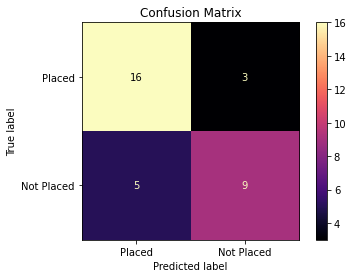

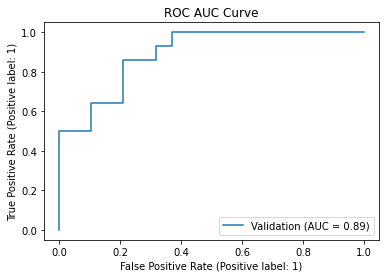

In [18]:
classifier = LogisticRegression
param = {"C":1, "random_state":20}
model_name = 'Lt'
run_name = 'LogisticRegression_model'
model_experimentation(classifier, param, model_name, run_name)

## Decision Tree Training and evaluation + MLFlow for model tracking

In [13]:
classifier = DecisionTreeClassifier
param = {"max_depth":3, "random_state":20}
model_name = 'dt'
run_name = 'DecisionTree_model'
model_experimentation(classifier, param, model_name, run_name)

2022/08/02 00:05:25 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.


FileNotFoundError: [Errno 2] No such file or directory: 'requirements.txt'

## Random Forest Training and evaluation + MLFlow for model tracking

2022/07/25 18:55:33 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.


Validación AUC:0.887218045112782


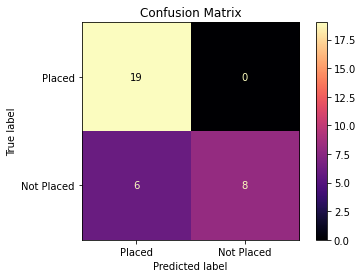

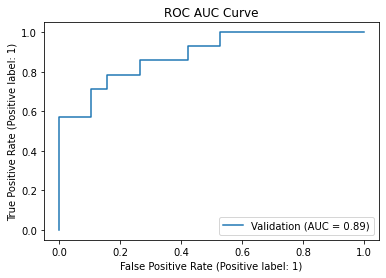

In [25]:
classifier = RandomForestClassifier
param = {"max_depth":3, "random_state":20}
model_name = 'rf'
run_name = 'randomForest_model'
model_experimentation(classifier, param, model_name, run_name)

## Gradient Boosting Training and evaluation + MLFlow for model tracking

2022/07/25 18:56:06 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.


Validación AUC:0.8909774436090225


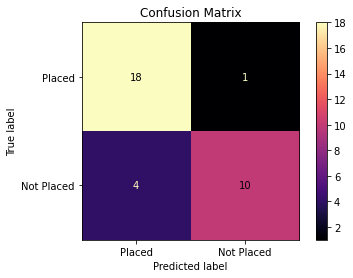

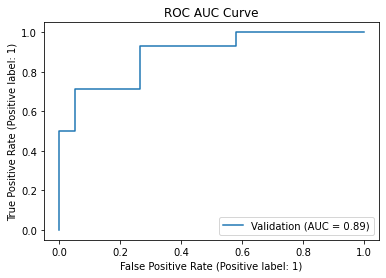

In [26]:
classifier = GradientBoostingClassifier
param = {"max_depth":3, "random_state":20}
model_name = 'gbm'
run_name = 'GradientBoosting_model'
model_experimentation(classifier, param, model_name, run_name)

## Lightgbm Training and evaluation + MLFlow for model tracking

[20]	training's auc: 0.980254	valid_1's auc: 0.883459
[40]	training's auc: 0.989177	valid_1's auc: 0.906015
[60]	training's auc: 0.994442	valid_1's auc: 0.902256
[80]	training's auc: 0.998245	valid_1's auc: 0.917293
[100]	training's auc: 0.999561	valid_1's auc: 0.917293
Validation AUC:0.9172932330827068


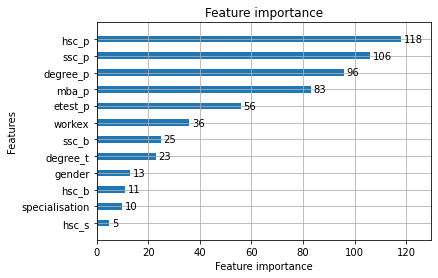

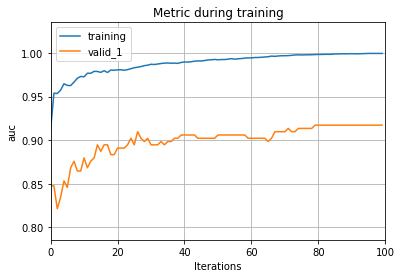

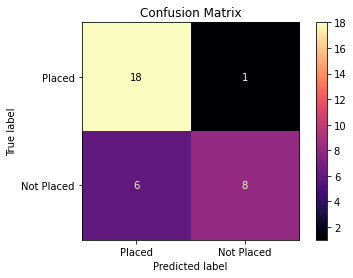

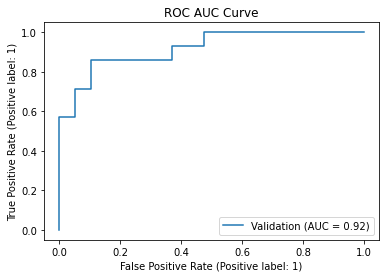

In [27]:
# Lanzar múltiples ejecuciones en un programa. Esto es fácil de hacer porque el objeto ActiveRun 
#devuelto por mlflow.start_run() es un
# Administrador de contexto de Python. Puede "alcanzar" cada ejecución a un solo bloque de código 
#de la siguiente manera:
with mlflow.start_run(experiment_id=experiment_id, run_name='Lightgbm_model') as run:
    # Get run id 
    run_id = run.info.run_uuid

    # Proporcione notas breves sobre el run
    MlflowClient().set_tag(run_id,
                           "mlflow.note.content",
                           "This is experiment for exploring different machine learning models for Campus Recruitment Dataset")

        
    # Define tag
    tags = {"Application": "Payment Monitoring Platform",
            "release.candidate": "PMP",
            "release.version": "2.2.0"}
            
    # Set Tag
    mlflow.set_tags(tags)
    
    # Log python environment details
    mlflow.log_artifact('requirements.txt')

    # Define model parameter
    params = {
        "objective": "binary",
        "learning_rate": 0.05,
        "metric": "auc",
        "colsample_bytree": 0.7,
        "subsample": 0.8,
        "seed": 42,
    }
        
    # logging params
    mlflow.log_params(params)
    
    # Perform model training
    lgb_clf = LGBMClassifier(**params)
    lgb_clf.fit(X_train, y_train, 
                eval_set = [(X_train, y_train), (X_valid, y_valid)], 
                early_stopping_rounds=50,
                verbose=20)
        
    # Log model artifacts
    mlflow.sklearn.log_model(lgb_clf, "model")
    
    # Perform model evaluation 
    lgb_valid_prediction = lgb_clf.predict_proba(X_valid)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_valid, lgb_valid_prediction)
    roc_auc = auc(fpr, tpr) # compute area under the curve
    print("=====================================")
    print("Validation AUC:{}".format(roc_auc))
    print("=====================================")   
        
    # log metrics
    mlflow.log_metrics({"Validation_AUC": roc_auc})
       
    # Plot and save feature importance details
    ax = plot_importance(lgb_clf, height=0.4)
    filename = './images/lgb_validation_feature_importance.png'
    plt.savefig(filename)
    # log model artifacts
    mlflow.log_artifact(filename)
    
    ax = plot_metric(lgb_clf.evals_result_)
    filename = './images/lgb_validation_metrics_comparision.png'
    plt.savefig(filename)
    # log model artifacts
    mlflow.log_artifact(filename)
    
    # Plot and save metrics details    
    plot_confusion_matrix(lgb_clf, X_valid, y_valid, 
                          display_labels=['Placed', 'Not Placed'],
                          cmap='magma')
    plt.title('Confusion Matrix')
    filename = './images/lgb_validation_confusion_matrix.png'
    plt.savefig(filename)
    # log model artifacts
    mlflow.log_artifact(filename)
    
    # Plot and save AUC details  
    plot_roc_curve(lgb_clf, X_valid, y_valid, name='Validation')
    plt.title('ROC AUC Curve')
    filename = './images/lgb_validation_roc_curve.png'
    plt.savefig(filename)
    # log model artifacts
    mlflow.log_artifact(filename)